# Imports

In [4]:
# ----- Tensorflow -----
import tensorflow as tf
from keras.models import Model
from keras.layers import Flatten, Dense, Input
from keras import optimizers as opt

# ----- Transfer learning -----
from keras.applications import NASNetLarge
from keras.applications import EfficientNetB0
from keras.applications import MobileNetV2

# ----- plot -----
import matplotlib.pyplot as plt
from keras.utils import plot_model

# ----- Utility functions -----
from utils import load_data, plot_hist, plot_hist_sideways, _convert_sample, get_features_and_labels, preprocess_data, augment_layer

# ------ Data ------
import numpy as np


In [7]:
data_dir = "C:/Users/chris/OneDrive - Syddansk Universitet/kandidat/3_semester\Maskinlæring/ds807_anvendt_maskinlæring/eksamen/exam/patch_camelyon"
BATCH_SIZE = 32
train, test, val = load_data(data_dir, perc=1, batch_size=BATCH_SIZE)

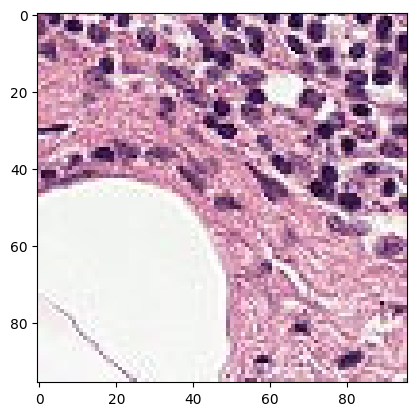

In [8]:
def prep(x):
    return x

imgs, lbs = preprocess_data(train, prep)

img = imgs[6]
plt.imshow(img)

Text(0.5, 1.0, 'Combined Augmentations')

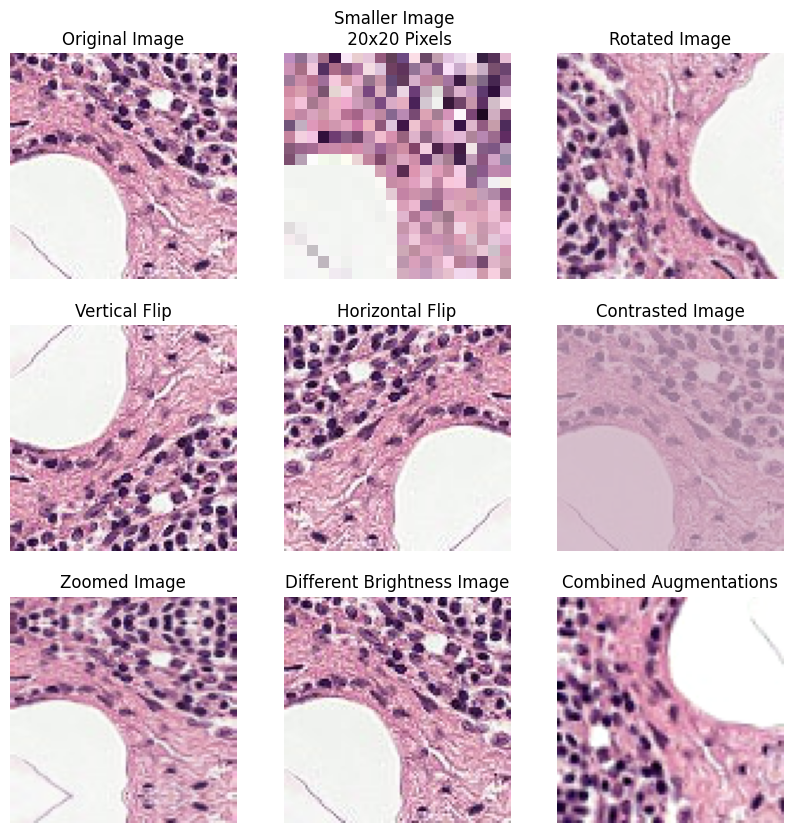

In [63]:
plt.figure(figsize=(10, 10))

# original image
ax = plt.subplot(3, 3, 1)
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")

# Smaller Image
augmented_image = augment_layer(size = 20)(img)
ax = plt.subplot(3,3,2)
plt.imshow(augmented_image)
plt.axis("off")
plt.title("Smaller Image \n 20x20 Pixels")

# Rotated Image
augmented_image = augment_layer(rotation=0.8)(img)
ax = plt.subplot(3,3,3)
plt.imshow(augmented_image)
plt.axis("off")
plt.title("Rotated Image")

# Flipped vertical
augmented_image = augment_layer(flip = "vertical")(img)
ax = plt.subplot(3,3,4)
plt.imshow(augmented_image)
plt.axis("off")
plt.title("Vertical Flip")

# Flipped horizontal
augmented_image = augment_layer(flip = "horizontal")(img)
ax = plt.subplot(3,3,5)
plt.imshow(augmented_image)
plt.axis("off")
plt.title("Horizontal Flip")


# Contrasted Image
augmented_image = augment_layer(contrast=0.99)(img)
ax = plt.subplot(3,3,6)
plt.imshow(augmented_image)
plt.axis("off")
plt.title("Contrasted Image")

# Zoomed Image
augmented_image = augment_layer(zoom=0.6)(img)
ax = plt.subplot(3,3,7)
plt.imshow(augmented_image)
plt.axis("off")
plt.title("Zoomed Image")

# Brighter Image
augmented_image = augment_layer(brightness=0.0001)(img)
ax = plt.subplot(3,3,8)
plt.imshow(augmented_image)
plt.axis("off")
plt.title("Different Brightness Image")

# Multiple changes
augmented_image = augment_layer(size = 80, flip="horizontal_and_vertical", rotation = 0.8, contrast=0.8, brightness=0.0001)(img)
ax = plt.subplot(3,3, 9)
plt.imshow(augmented_image)
plt.axis("off")
plt.title("Combined Augmentations")